# TextRecognitionDataGenerator demo

Github
- https://github.com/Belval/TextRecognitionDataGenerator

DOCS
- https://textrecognitiondatagenerator.readthedocs.io/en/latest/?badge=latest

In [1]:
# TextRecognitionDataGenerator 설치
# pip install trdg

신발 상품번호와 유사한 랜덤 문자열 생성

In [2]:
import random   
import string  
import secrets
from PIL import Image

num_string = 8 # 최대 num개의 문자 선택
total_string = 5 

# 영어 대문자, 숫자, -, 공백을 포함한 랜덤 문자열 생성
results = []
for _ in range(total_string):
    random_string = ''.join(secrets.choice(string.ascii_uppercase + string.digits + '-' + ' ') for x in range(num_string))
    results.append(random_string)
results[:5]

['OOUTABBG', 'BOZ4AY3-', 'OQNC8H70', 'HALTVOWF', 'JHY0O-YZ']

메타데이터 기록할 데이터프레임 생성

In [3]:
import pandas as pd
df = pd.DataFrame({'file_name':[],'file_size':[],'image_h':[],'image_w':[],'product_no':[],'status':[]})
df

,file_name,file_size,image_h,image_w,product_no,status


데이터에 다양성을 줄 요소
- 글씨 색상
- 이미지 크기
- 흐림 정도
- 폰트는 거의 고딕?

OOUTABBG


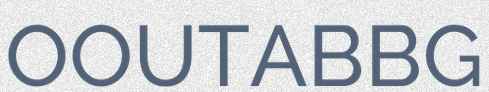


BOZ4AY3-


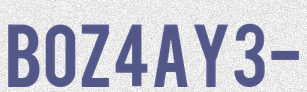


OQNC8H70


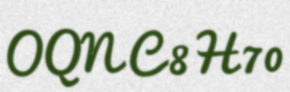


HALTVOWF


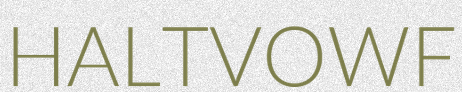


JHY0O-YZ


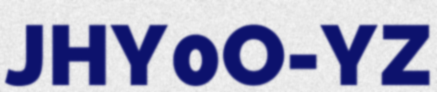

In [9]:
from trdg.generators import (
    GeneratorFromDict,
    GeneratorFromRandom,
    GeneratorFromStrings,
    GeneratorFromWikipedia,
)

# 이미지 저장을 위한 syns_images 생성
from pathlib import Path
Path("./syns_images").mkdir(parents=False, exist_ok=True)

# The generators use the same arguments as the CLI, only as parameters
generator = GeneratorFromStrings(
    strings = results,    # 문자열
    count = total_string, # 생성할 이미지 개수
    size = 92,            # 이미지 가로 길이
    # distorsion_type = 3,  # 왜곡 정도
    blur = 1,             # 흐림 정도
    random_blur = True,   # 흐림 랜덤
    text_color = '#000000,#888888', # 색상 랜덤
)

x = 0
for img, lbl in generator:
    # 메타데이터 추가
    df=df.append({'file_name': lbl+'.jpg', 'product_no' : lbl , 'image_h' : img.size[0], 'image_w':img.size[1], 'status' : 'Blur'} , ignore_index=True)
    
    print(lbl)                  # 문자열 출력
    img.show()                  # 이미지 출력
    img.save(f'syns/{lbl}.jpg') # 이미지 저장
    print()

데이터프레임 확인

In [5]:
df

,file_name,file_size,image_h,image_w,product_no,status
0,OOUTABBG.jpg,NaN,489.0,92.0,OOUTABBG,Blur
1,BOZ4AY3-.jpg,NaN,307.0,92.0,BOZ4AY3-,Blur
2,OQNC8H70.jpg,NaN,290.0,92.0,OQNC8H70,Blur
3,HALTVOWF.jpg,NaN,462.0,92.0,HALTVOWF,Blur
4,JHY0O-YZ.jpg,NaN,437.0,92.0,JHY0O-YZ,Blur
